# Проект: Исследование стартапов

## Введение

Необходимо исследовать исторические данные с целью разработки модели бизнеса по покупке, развитию и перепродаже перспективных стартапов. Данные нужно в том числе оценить на полноту и возможные искажения, проверить соответстуют ли они здравому смыслу, ответить на вопросы заказчика о предобратке данных и их значении для бизнеса.

**Описание данных**

Таблица acquisition\
Содержит информацию о покупках одними компаниями других компаний:
-	id — идентификатор покупки.
-	acquiring_company_id — идентификатор покупающей компании.
-	acquired_company_id — идентификатор покупаемой компании.
-	term_code — варианты расчёта.
-	price_amount — сумма сделки.
-	acquired_at — дата сделки.

Tаблица company_and_rounds
Содержит информацию о компаниях и раундах финансирования:
-	company ID — идентификатор компании.
-	name — название компании.
-	category code — категория области деятельности компании.
-	status — статус компании.
-	founded at — дата инвестирования.
-	closed at — дата закрытия компании.
-	domain — официальный сайт компании.
-	network username — ник компании в сети.
-	country code — код страны компании.
-	investment rounds — число инвестиционных раундов.
-	funding rounds — число раундов финансирования.
-	funding total — сумма финансирования.
-	milestones — вехи финансирования.
-	funding round id — идентификатор этапа финансирования.
-	company id — идентификатор компании.
-	funded at — дата финансирования.
-	funding round type — тип финансирования.
-	raised amount — сумма финансирования.
-	pre money valuation — предварительная денежная оценка.
-	participants — число участников.
-	is first round — является ли раунд первым.
-	is last round — является раунд последним.

Таблица education\
Содержит информацию об образовании сотрудника:
-	id — идентификатор записи об образовании.
-	person_id — идентификатор работника.
-	instituition — название учебного заведения.
-	graduated_at — дата получения образования.

Таблица people\
Содержит информацию о сотрудниках:
-	id — идентификатор сотрудника.
-	first_name — имя сотрудника.
-	last_name — фамилия сотрудника.
-	company_id — идентификатор компании.
-	network_username — ник в социальных сетях.

Tаблица degrees\
Содержит информацию о типе образования сотрудника:
-	id — идентификатор записи.
-	object_id — идентификатор сотрудника.
-	degree_type — тип образования.
-	subject — специальность.

Дополнительные таблицы

Таблица fund\
Содержит информацию о фондах:
-	id — идентификатор фонда.
-	name — название фонда.
-	category_code — категория области деятельности компании.
-	founded_at — дата создания фонда.
-	domain — сайт фонда.
-	network_username — ник фонда в сети.
-	country_code — код страны фонда.
-	investment_rounds — число инвестиционных раундов.
-	invested_companies — число профинансированных компаний.
-	milestones — вехи финансирования.

Таблица investment\
Содержит информацию о раундах инвестирования:
-	id — идентификатор этапа инвестирования.
-	funding_round_id — идентификатор раунда инвестирования.
-	company_id — индентификатор компании.
-	funding_round_type — тип финансирования.
-	fund_id — идентификатор фонда.



## 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv
* fund.csv
* investment.csv




### 1.1. Вывод общей информации, исправление названия столбцов


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

!pip install missingno
import missingno as msno
!pip install matplotlib-venn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45437 sha256=6701fbfb414fd50771dced369956701fe9d2261c028a7900d3b7bbba704dd202
  Stored in directory: c:\users\3katy\appdata\local\pip\cache\wheels\86\29\d8\0f3c5a37c967a34fb40aaabd414f92104d2ad5fb149c0114a1
Successfully built matplotlib-venn


Выгрузим данные в переменные.

In [2]:
PATH = "https://code.s3.yandex.net/datasets/"
acquisition_df = pd.read_csv(PATH + 'acquisition.csv')
company_rounds_df = pd.read_csv(PATH + 'company_and_rounds.csv')
people_df = pd.read_csv(PATH + 'people.csv')
education_df = pd.read_csv(PATH + 'education.csv')
degrees_df = pd.read_csv(PATH + 'degrees.csv')

Выведем информацию о датасете `acquisition_df` и его первые строки.

In [3]:
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [4]:
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


Датасет `acquisition_df` содержит 9407 строк, 6 столбцов, в которых представлена информация о покупках одними компаниями других компаний.\
4 столбца имеют тип данных `int64`: столбцы `id`, `acquiring_company_id`, `acquired_company_id`, `price_amount` содержат целочисленные данные и тип `int64` для них подходит.\
2 столбца имеют тип данных `object`: столбец `term_code` содержит текстовые данные и тип `object` для них подходит. Столбец `acquired_at` содержит информацию о дате, и его тип нужно поменять на `datetime64`.\
Пропуски содержатся в столбцах `term_code`, `acquired_at`.\
Названия столбцов содержат только буквы в нижнем регистре. Названия приведены к стилю snake case. 

Выведем информацию о датасете `company_rounds_df` и его первые строки.

In [5]:
company_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [6]:
company_rounds_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Датасет `company_rounds_df`содержит 217774 строк, 22 столбца, в которых представлена информация о компаниях и раундах финансирования.\
12 столбцов имеют тип данных `float64`: в этих столбцах можно оставить тип `float64`.\
10 столбцов имеют тип данных `object`: в столбцах `name`, `category  code`, `status`, `funding  round  type`, `domain`, `network  username`, `country  code`. содержатся текстовые данные, и тип данных `object` для них подходит. В столбцах `founded  at`, `closed  at`, `funded  at` содержится информация о датах, и тип данных нужно изменить на `datetime64`.\
Пропуски содержатся во всех столбцах.\
В названии столбца `founded  at` видимо опечатка - должно быть `funded  at`, так как это дата инвестирования, а не основания компании.
Названия столбцов необходимо привести к стилю snake case.

Проверим столбцы `company ID` и `company id` на совпадение значений. 

In [7]:
len(set(company_rounds_df['company  ID']).intersection(company_rounds_df['company  id']))

31707

Посчитаем количество уникальных значений столбца `company  id`.

In [8]:
company_rounds_df['company  id'].nunique()

31939

Большинство значений столбца `company  id` совпадает со значениями столбца `company  ID`. Очевидно это одни и те же данные.

Визуализируем совпадения.

In [9]:


from matplotlib_venn import venn2, venn2_circles, venn2_unweighted



Построим диаграмму Венна.

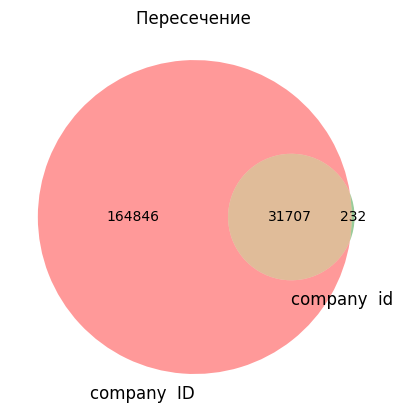

In [10]:
first_id = set(company_rounds_df['company  ID'].dropna().unique())
second_id = set(company_rounds_df['company  id'].dropna().unique())
# Строим диаграмму Венна
venn2([first_id, second_id], set_labels=('company  ID', 'company  id'))

# Отображаем график
plt.title("Пересечение ")
plt.show() 

Только 232 значения столбца `company  id` не совпадает со значениями столбца `company  ID`.  В этих столбцах находятся одни и те же данные.

Выведем информацию о датасете people_df и его первые строки.

In [11]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [12]:
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


Датасет `people_df` содержит 226709 строк и 5 столбцов.\
Столбец `company_id` имеет тип данных `float64`. Можно не менять тип данных.\
Столбец `id` имеет тип данных `int64`, который подходит для содержащихся в нем значений.\
Три столбца имеют тип данных `object` (`first_name`, `last_name`, `network_username`). Они содержат текстовые данные, и тип данных `object` для них подходит.\
Пропуски есть в столбцах `first_name`, `last_name`, `network_username`, `company_id`.\
Названия столбцов содержат только буквы в нижнем регистре. Названия приведены к стилю snake case. 

Выведем информацию о датасете `education_df` и его первые строки.

In [13]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [14]:
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


Датасет `education_df` содержит 109610 строк и 4 столбца.\
Столбец `company_id` имеет тип данных `float64`. Можно не менять тип данных.\
Два столбца (`id`, `person_id`) имеют тип данных `int64`, который подходит для содержащихся в них значений.\
Два столбца имеют тип данных `object`. Столбец `instituition` содержит текстовые данные, и тип данных `object` для него подходит. Столбец `graduated_at` содержит дату. Его формат нужно поменять на  `datetime64`.\
Пропуски есть в столбцах `instituition`, `graduated_at`.\
Названия столбцов содержат только буквы в нижнем регистре. Названия приведены к стилю snake case. 

Выведем информацию о датасете `degrees_df` и его первые строки.

In [15]:
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [16]:
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


Датасет `degrees_df` содержит 109610 строк, 4 столбца.\
Тип данных столбеца `id` (`int64`) соответствует данным в столбце.\
Три столбца имеют тип данных `object`: столбцы `object_id`, `degree_type`, `subject` содержат текстовые данные, поэтому тип данных `object` для них подходит.\
Пропуски есть в столбцах `degree_type`и `subject`.\
Названия столбцов содержат только буквы в нижнем регистре. Названия приведены к стилю snake case. 

Загрузим в переменные и выведем информацию также у дополнительных датасетов fund.csv и investment.csv.

In [17]:
fund_df = pd.read_csv(PATH + 'fund.csv')

fund_df.info()
fund_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [18]:
investment_df = pd.read_csv(PATH + 'investment.csv')

investment_df.info()
investment_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


### 1.2. Смена типов и анализ пропусков


Поменяем типы данных в столбцах, содержащих значения даты.

In [19]:
acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'], format='%Y-%m-%d')

acquisition_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [20]:
for column in ['founded  at', 'closed  at', 'funded  at']:
    company_rounds_df[column] = pd.to_datetime(company_rounds_df[column])
    
company_rounds_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   company  ID            217472 non-null  float64       
 1   name                   217472 non-null  object        
 2   category  code         143886 non-null  object        
 3   status                 217472 non-null  object        
 4   founded  at            109956 non-null  datetime64[ns]
 5   closed  at             3449 non-null    datetime64[ns]
 6   domain                 147159 non-null  object        
 7   network  username      95534 non-null   object        
 8   country  code          108607 non-null  object        
 9   investment  rounds     217472 non-null  float64       
 10  funding  rounds        217472 non-null  float64       
 11  funding  total         217472 non-null  float64       
 12  milestones             217472 non-null  floa

In [21]:
education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at'])

education_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


Типы данных изменены.

Изменим названия столбцов.

In [22]:
company_rounds_df.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

In [23]:
new_columns_name = ['company_id', 'name', 'category_code', 'status', 'funded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_', 'funded_at_',
       'funding_round_type', 'raised_amount', 'pre_money_valuation',
       'participants', 'is_first_round', 'is_last_round']

company_rounds_df.columns = new_columns_name

company_rounds_df.columns

Index(['company_id', 'name', 'category_code', 'status', 'funded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_', 'funded_at_', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

Названия столбцов изменены.

Изучим количество пропусков в данных.

In [24]:
acquisition_df.isna().sum()

id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

In [25]:
round(acquisition_df.isna().mean() * 100, 2)

id                       0.00
acquiring_company_id     0.00
acquired_company_id      0.00
term_code               80.54
price_amount             0.00
acquired_at              0.31
dtype: float64

Датасет `acquisition_df`: в столбце `term_code` 7576 пропусков (80,54%); в столбце `acquired_at` 29 пропусков (0,31%). Заполнять пропуски не нужно.

In [26]:
company_rounds_df.isna().sum()

company_id                302
name                      302
category_code           73888
status                    302
funded_at              107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id_            164846
funded_at_             165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
dtype: int64

In [27]:
round(company_rounds_df.isna().mean() * 100, 2)

company_id              0.14
name                    0.14
category_code          33.93
status                  0.14
funded_at              49.51
closed_at              98.42
domain                 32.43
network_username       56.13
country_code           50.13
investment_rounds       0.14
funding_rounds          0.14
funding_total           0.14
milestones              0.14
funding_round_id       75.70
company_id_            75.70
funded_at_             75.81
funding_round_type     75.70
raised_amount          75.70
pre_money_valuation    75.70
participants           75.70
is_first_round         75.70
is_last_round          75.70
dtype: float64

В датасете `company_rounds_df` пропуски есть во всех столбцах. По 302 пропуска (0,14%) в столбцах `company_ID`, `name`, `status`, `investment_rounds`, `funding_rounds`, `funding_total`, `milestones`. Пропусков в столбцах `category_code` - 73888 (33,93%), `founded_at` - 107818 (49,51%), `closed_at` - 214325 (98,42), `domain` - 70615 (32,43%), `network_username` - 122240 (56,13%), `country_code` - 109167 (50,13%). По 164846 пропуска (75,7%) в столбцах `funding_round_id`, `company_id`, `funding_round_type`, `raised_amount`, `pre_money_valuation`, `participants`, `is_first_round`, `is_last_round`. В столбце `funded_at` - 165094 пропуска (75,81%).

В последних столбцах, начиная с 'funding_round_id' количество пропусков одинаковое и сильно отличается от количества пропусков в столбцах до 'funding_round_id' (в этих столбцах также есть некоторые с большим количеством пропусков, но в них количество пропусков разное). С другой стороны, в столбцах с 0 по 12 также есть столбцы с одинаковым количеством пропусков.

<AxesSubplot:>

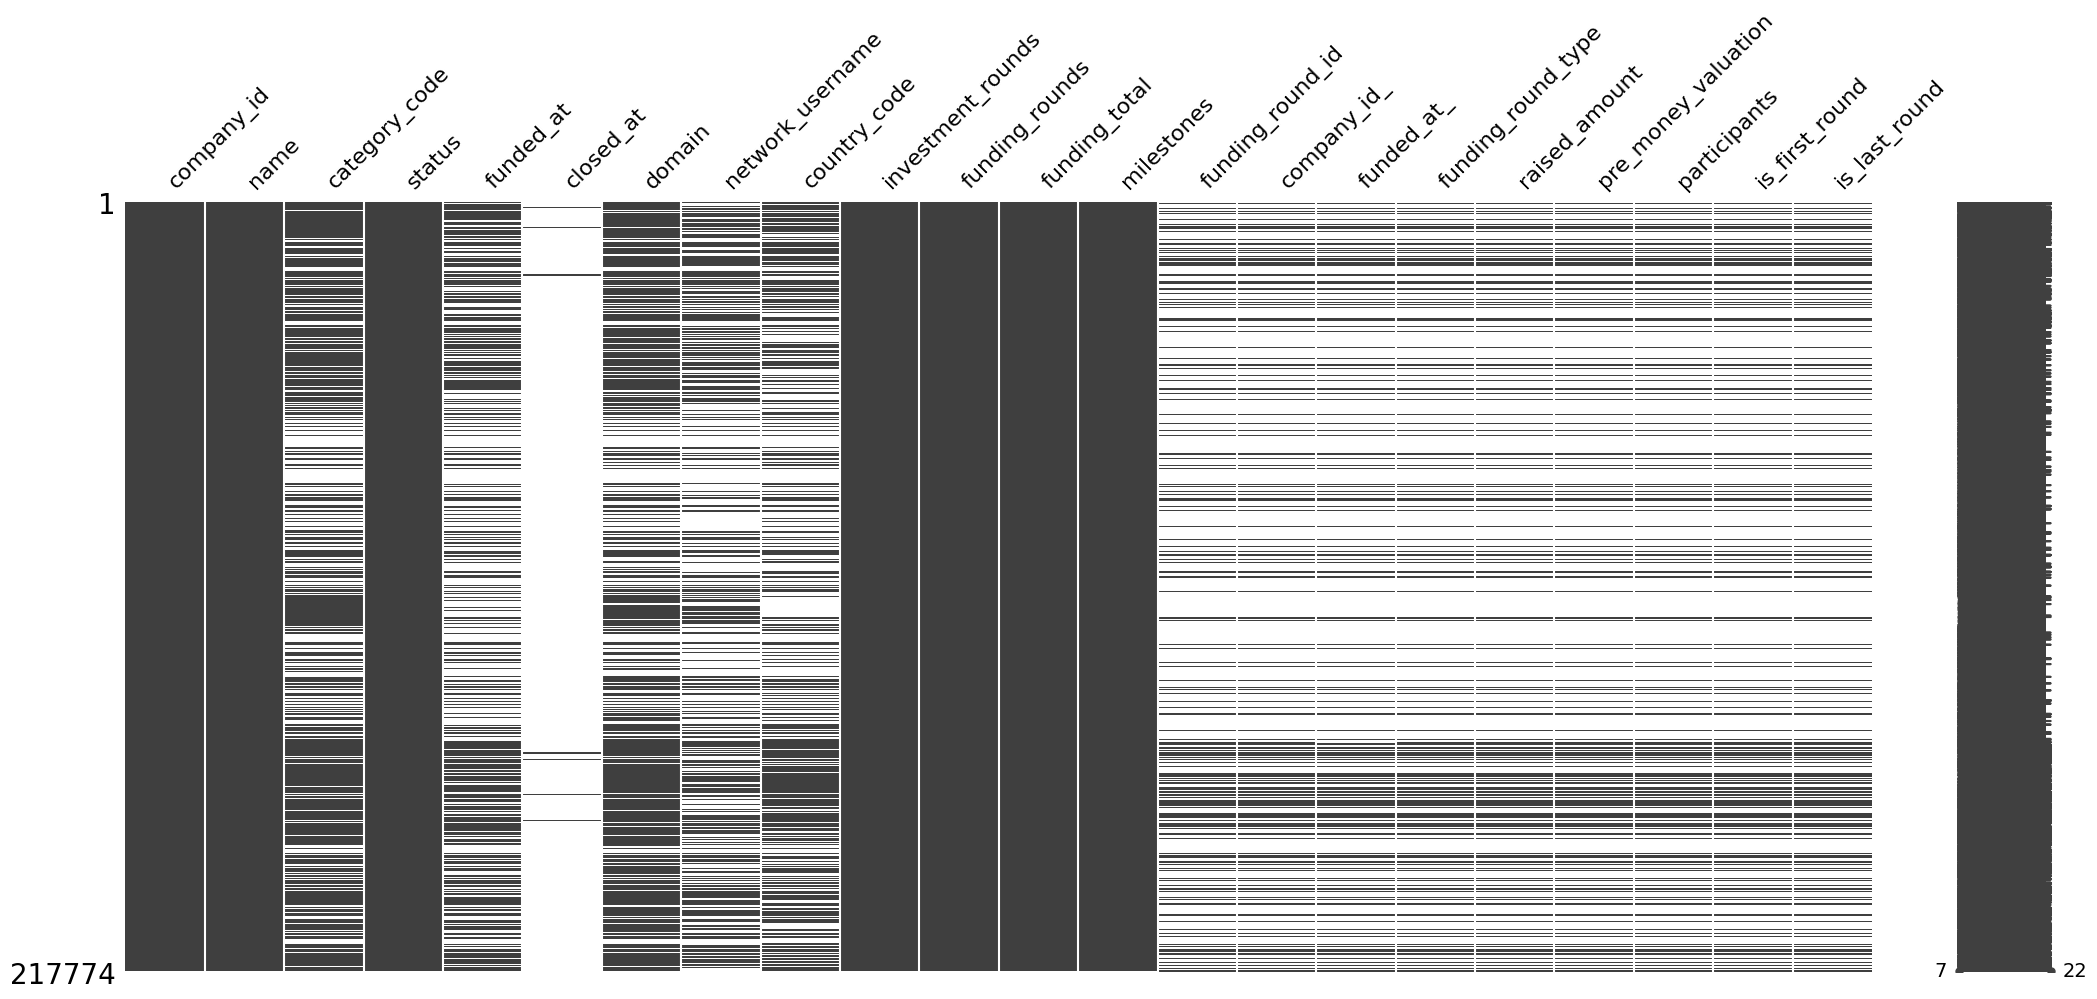

In [28]:
msno.matrix(company_rounds_df)

Хотя в столбцах с 0 по 12 есть столбцы с большим количеством пропусков, но там также есть столбцы, в которых мало пропусков. В столбцах, начиная с 13-го количество пропусков больше и постоянно для всех столбцов. Две части датасета значительно отличаются по структуре пропусков.

Посчитаем количество пропусков в датасетет `education_df`.

In [29]:
education_df.isna().sum()

id                  0
person_id           0
instituition       55
graduated_at    51556
dtype: int64

In [30]:
round(education_df.isna().mean() * 100, 2)

id               0.00
person_id        0.00
instituition     0.05
graduated_at    47.04
dtype: float64

В датасете `education_df` пропуски есть в столбцах: `instituition` - 55 (0,05%) и `graduated_at` - 51556 (47,04%).

Посчитаем количество пропусков в датасетет `people_df`.

In [31]:
people_df.isna().sum()

id                       0
first_name               5
last_name                1
company_id          192094
network_username    187842
dtype: int64

In [32]:
round(people_df.isna().mean() * 100, 2)

id                   0.00
first_name           0.00
last_name            0.00
company_id          84.73
network_username    82.86
dtype: float64

В датасете `people_df` пропуски есть в столбцах: `first_name` - 5, `last_name` - 1, `company_id` - 192094 (84,73%), `network_username` - 187842 (82,86%)

Посчитаем количество пропусков в датасетет `degrees_df`

In [33]:
degrees_df.isna().sum()

id                 0
object_id          0
degree_type    11218
subject        28312
dtype: int64

In [34]:
round(degrees_df.isna().mean() * 100, 2)

id              0.00
object_id       0.00
degree_type    10.23
subject        25.83
dtype: float64

В датасете `degrees_df` пропуски есть в столбцах: `degree_type` - 11218 (10,23%), `subject` - 28312 (25,83%).

Для того, чтобы оценить полноту данных для решения задач проекта, ограничим датасет `company_rounds_df` нужными столбцами и строками, в которых в столбце `raised_amount` нет пропусков.

In [35]:
raised_amount_df = company_rounds_df[company_rounds_df['raised_amount'].notnull()][['funding_round_id', 'funded_at', 'raised_amount']]

Выведем информацию о количестве пропусков в датасете `raised_amount_df`.

In [36]:
raised_amount_df.isna().sum()

funding_round_id       0
funded_at           9732
raised_amount          0
dtype: int64

In [37]:
round(raised_amount_df.isna().mean() * 100, 2)

funding_round_id     0.00
funded_at           18.39
raised_amount        0.00
dtype: float64

Среди данных, необходимых для определения среднего размера средств, выделяемых в рамках одного раунда и общего количества раундов по годам, пропуски есть только в столбце `funded_at` - 248 (0,47%). Для решения данной задачи пропусков допустимое количество. Однако, необходимо учитывать, что из-за большого количества пропусков в датасете `company_rounds_df` сводная таблица "Раунды финансирования по годам", основанная на столбце `raised_amount`, может быть составлена на основании лишь 24,3% данных датасета `company_rounds_df` (доля пропусков в столбце `raised_amount` - 75,7%).

Проверим датафрейм `education_df` на дубликаты.

In [38]:
education_df.duplicated().sum()

0

Явных дубликатов нет. Приведем значения в столбце `instituition` к нижнему регистру и проверим есть ли дубликаты по трем столбцам: `person_id`, `instituition`, `graduated_at`.

In [39]:
education_df['instituition'] = education_df['instituition'].str.lower()
education_df.duplicated(subset=['person_id', 'instituition', 'graduated_at']).sum()

4147

In [40]:
education_df[education_df.duplicated(subset=['person_id', 'instituition', 'graduated_at'], keep=False) == 1].head()

,id,person_id,instituition,graduated_at
34,35,6614,university of texas,1998-01-01
35,36,6614,university of texas,1998-01-01
46,47,2216,stanford university,NaT
47,48,2216,stanford university,NaT
53,54,2371,"university of california, berkeley",NaT


Удалим дубликаты.

In [41]:
print(f'Количество строк до удаления дубликатов {education_df.shape[0]}')
education_df = education_df.drop_duplicates(subset=['person_id', 'instituition', 'graduated_at'])
print(f'Количество строк после удаления дубликатов {education_df.shape[0]}')


Количество строк до удаления дубликатов 109610
Количество строк после удаления дубликатов 105463


Проверим датафрейм `people_df` на дубликаты.

In [42]:
people_df.duplicated().sum()

0

Явных дубликатов нет.

Проверим датасет `acquisition_df` на дубликаты.

In [43]:
acquisition_df.duplicated().sum()

0

Явных дубликатов нет.

## 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам


In [44]:
#Для группировки по годам выделим из даты год
company_rounds_df['funded_at_year'] = company_rounds_df['funded_at_'].dt.to_period('Y')

pivot_year_rounds = pd.pivot_table(company_rounds_df,index='funded_at_year',
                                   values=['funding_round_id', 'raised_amount'],
                                   aggfunc={'funding_round_id': 'count', 'raised_amount': 'median'}).sort_values(by='funded_at_year')
pivot_year_rounds[pivot_year_rounds['funding_round_id'] > 50].reset_index()

,funded_at_year,funding_round_id,raised_amount
0,1999,76,2000000.0
1,2000,125,4200000.0
2,2001,96,3000000.0
3,2002,116,4200000.0
4,2003,159,3000000.0
5,2004,291,5000000.0
6,2005,1633,5500000.0
7,2006,2436,5000000.0
8,2007,3279,3973320.0
9,2008,3774,3110000.0


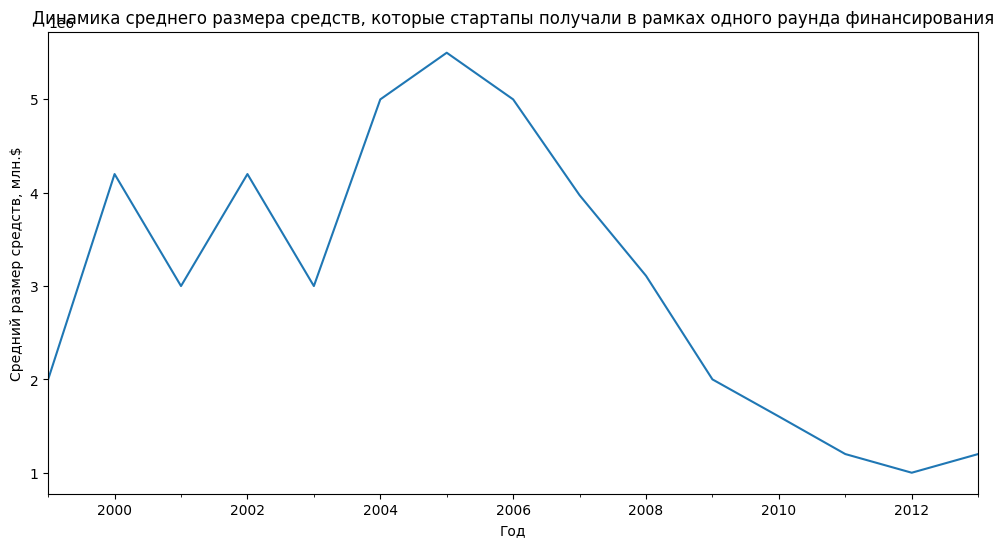

In [45]:
pivot_year_rounds[pivot_year_rounds['funding_round_id'] > 50].plot(kind='line',
                                                                  figsize=(12,6),
                                                                  y='raised_amount',
                                                                  legend=False,
                                                                  title='Динамика среднего размера средств, которые стартапы получали в рамках одного раунда финансирования'
                                                                  )
        
plt.xlabel('Год')
plt.ylabel('Средний размер средств, млн.$')

plt.show()

Типичный размер собранных в рамках одного раунда средств был максимален в 2005 году.

Динамика среднего размера средств, которые стартапы получали в рамках одного раунда финансирования 
 и общего количества раундов за год.


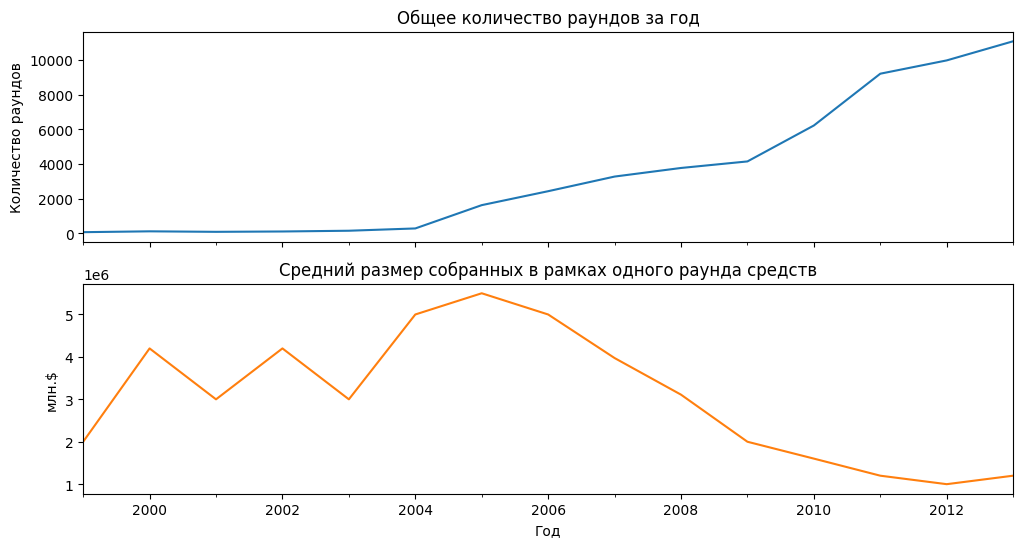

In [46]:
print('Динамика среднего размера средств, которые стартапы получали в рамках одного раунда финансирования \n и общего количества раундов за год.')
pivot_year_rounds[pivot_year_rounds['funding_round_id'] > 50].plot(kind='line',
                                                                  figsize=(12,6),
                                                                  subplots=True,
                                                                  sharex=True,
                                                                  sharey=False,
                                                                  legend=False,
                                                                  title=['Общее количество раундов за год', 
                                                                         'Средний размер собранных в рамках одного раунда средств'],
                                                                  ylabel=('Количество раундов')
                                                                  )

plt.xlabel('Год')
plt.ylabel('млн.$')

plt.show()

В 2013 году типичный размер собранных в рамках одного раунда средств и общее количество раундов финансирования за год выросли по сравнению с 2012 годом. При этом общее количество раундов финансирования за год увеличивалось с 2001г. C 2005г. типичный размер средств падает, а общее количество раундов за год растет.


### 2.2. Люди и их образование


Проверим, можно ли использовать столбец `person_id` датасета `education_df` и столбец `id` датасета `people_df` для объединения датасетов.

In [47]:
test_df = pd.merge(people_df, education_df, left_on='id', right_on='person_id', how='inner', suffixes = ('_people','_education'))
print(f'Доля строк датасета education_df, вошедших в объединенный датасет {round(test_df.shape[0] / education_df.shape[0], 2)}')

Доля строк датасета education_df, вошедших в объединенный датасет 0.99


Для 99% строк датасета `education_df` значения столбца `person_id` совпадают со значениями в столбце `id` датасета `people_df`. Можно использовать эти столбцы для объединения датасетов.

In [48]:
test_df[test_df['company_id'] == 1]

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at
79642,3,Kevin,Flaherty,1.0,NaN,706,3,washington university in st louis,NaT
79643,3,Kevin,Flaherty,1.0,NaN,707,3,indiana university,NaT


Так как в датасете `education_df` может быть несколько строчек, относящихся к одному человеку, то при объединении датасетов также может получится несколько строчек, относящихся к одному человеку. Поэтому будем определять границы групп компаний по количеству сотрудников по датасету `people_df`. Проверим уникальны ли значения в столце `id`.

In [49]:
people_df['id'].nunique()

226708

In [50]:
people_df.shape[0]

226709

В столце `id` есть одно повторяющееся значение. Выведем строки с повторяющимся `id`.

In [51]:
people_df['id'].value_counts().sort_values(ascending=False)

116554    2
30735     1
32784     1
8196      1
10245     1
         ..
22517     1
20470     1
18423     1
16376     1
2047      1
Name: id, Length: 226708, dtype: int64

In [52]:
people_df[people_df['id'] == 116554]

,id,first_name,last_name,company_id,network_username
13171,116554,Nicole,Couto,200243.0,NaN
13172,116554,Nicole,Couto,212993.0,NaN


Возможно этот человек последовательно работал в двух компаниях.

Сгруппируем данные в датасете `people_df` по `company_id`.

In [53]:
grouped_df = people_df.groupby('company_id')['id'].count().reset_index()

In [54]:
grouped_df['id'].describe()

count    22922.000000
mean         1.510121
std          2.764321
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        244.000000
Name: id, dtype: float64

В большинстве компаний работает 1 сотрудник. Посчитаем количество компаний для разной численности сотрудников.

In [55]:
grouped_df['id'].value_counts()

1      18117
2       2709
3        921
4        450
5        237
6        138
7        100
8         59
9         46
11        30
10        25
13        17
12        16
14         8
17         5
16         4
23         3
15         3
20         3
18         3
19         3
21         2
22         2
56         2
25         2
29         2
35         1
47         1
31         1
48         1
61         1
51         1
138        1
26         1
244        1
72         1
36         1
39         1
32         1
150        1
63         1
Name: id, dtype: int64

В большинстве компаний работает 1 сотрудник. Следущий "порог" по численности - компании, в которых работает 2 или 3 сотрудника. Для такой численности можно создать по отдельной группе. Тогда можно выделить следующие группы компаний: "1 сотрудник", "2 сотрудника", "3 сотрудника", "4-12 сотрудников", "13-50 сотрудников", "более 50 сотрудников".

In [56]:
grouped_df['company_category'] = pd.cut(grouped_df['id'], bins=[0, 1, 2, 3, 12, 50, float('inf')], labels=['1 сотрудник', '2 сотрудника', '3 сотрудника', '4-12 сотрудников', '13-50 сотрудников', 'более 50 сотрудников'])
grouped_df.head()

,company_id,id,company_category
0,1.0,2,2 сотрудника
1,2.0,1,1 сотрудник
2,3.0,3,3 сотрудника
3,4.0,13,13-50 сотрудников
4,5.0,61,более 50 сотрудников


Изменим название столбца `id` датасета `grouped_df`.

In [57]:
grouped_df = grouped_df.rename(columns={'id': 'employee_nmb'})
grouped_df.columns

Index(['company_id', 'employee_nmb', 'company_category'], dtype='object')

Присоединим датасет `grouped_df` к датасету `people_df` по столбцу `company_id`.

In [58]:
people_company_category_df = people_df.merge(grouped_df, on='company_id', how='left')
people_company_category_df.head()

,id,first_name,last_name,company_id,network_username,employee_nmb,company_category
0,10,Mark,Zuckerberg,5.0,NaN,61.0,более 50 сотрудников
1,100,Peter,Lester,27.0,NaN,10.0,4-12 сотрудников
2,1000,Dr. Steven,E. Saunders,292.0,NaN,3.0,3 сотрудника
3,10000,Neil,Capel,2526.0,NaN,2.0,2 сотрудника
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN


In [59]:
people_company_category_df.shape

(226709, 7)

Объединим датасеты `people_company_category_df` и `education_df` по столбцам  `person_id` и `id`

In [60]:
people_education_df = people_company_category_df.merge(education_df, left_on='id', right_on='person_id', how='left', suffixes = ('_people','_education'))
people_education_df.shape

(263558, 11)

Строк получилось больше, чем в датасете `people_company_category_df`, потому что значения столбца 'person_id' в датасете `education_df` повторяются.

In [61]:
people_education_df.head()

,id_people,first_name,last_name,company_id,network_username,employee_nmb,company_category,id_education,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,61.0,более 50 сотрудников,2415.0,10.0,harvard university,NaT
1,100,Peter,Lester,27.0,NaN,10.0,4-12 сотрудников,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,3.0,3 сотрудника,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,2.0,2 сотрудника,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


Добавим в датасет столбец `no_education`. Значение столбца равно True, если нет информации в столбце `instituition`.

In [62]:
people_education_df['no_education'] = people_education_df['instituition'].isna()
people_education_df.head()

,id_people,first_name,last_name,company_id,network_username,employee_nmb,company_category,id_education,person_id,instituition,graduated_at,no_education
0,10,Mark,Zuckerberg,5.0,NaN,61.0,более 50 сотрудников,2415.0,10.0,harvard university,NaT,False
1,100,Peter,Lester,27.0,NaN,10.0,4-12 сотрудников,NaN,NaN,NaN,NaT,True
2,1000,Dr. Steven,E. Saunders,292.0,NaN,3.0,3 сотрудника,NaN,NaN,NaN,NaT,True
3,10000,Neil,Capel,2526.0,NaN,2.0,2 сотрудника,NaN,NaN,NaN,NaT,True
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True


Удалим возможные дубликаты по столбцу `id_people`. Дубликаты по столбцу `id_people` возможны, если в датасете `education_df` для одного значения столбца `id_people` было несколько строчек с разными значениями в столбце `instituition`. С точки зрения наличия/отсутствия информации об образовании, все равно какие из дублирующих строчек удалят.

In [63]:
people_unique_education_df = people_education_df.drop_duplicates(subset='id_people', inplace=False)

print(f'Количество строк до удаления дубликатов по столбцу id_people {people_education_df.shape[0]}')
print(f'Количество строк до удаления дубликатов по столбцу id_people {people_unique_education_df.shape[0]}')


Количество строк до удаления дубликатов по столбцу id_people 263558
Количество строк до удаления дубликатов по столбцу id_people 226708


Посчитаем долю сотрудников без информации об образовании в каждой из групп компаний.

In [64]:
round(people_unique_education_df.groupby('company_category')['no_education'].mean(), 2)


company_category
1 сотрудник             0.46
2 сотрудника            0.47
3 сотрудника            0.49
4-12 сотрудников        0.51
13-50 сотрудников       0.38
более 50 сотрудников    0.29
Name: no_education, dtype: float64

Доли сотрудников без информации об образовании составляют:
- для группы "1 сотрудник" - 0,46;
- для группы "2 сотрудника" - 0,47;
- для группы "3 сотрудника" - 0,49;
- для группы "4-12 сотрудников" - 0,51;
- для группы "13-50 сотрудников" - 0,38;
- для группы "более 50 сотрудников" - 0,29.

Для крупных стартапов доля сотрудников без образования меньше.

В столбце `object_id` датасета `degrees_df`, содержащем идентификатор сотрудника, кроме цифр есть еще буквы и знаки (тип данных `object`). В столбце `id_people` датасета `people_education_df`, содержащего идентификатор сотрудника, находятся только цифры (тип данных `int64`). Так как информация в этих столбцах не совпадает, то объединить датасеты по этим столбцам нельзя.

In [65]:
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [66]:
people_education_df.head()

,id_people,first_name,last_name,company_id,network_username,employee_nmb,company_category,id_education,person_id,instituition,graduated_at,no_education
0,10,Mark,Zuckerberg,5.0,NaN,61.0,более 50 сотрудников,2415.0,10.0,harvard university,NaT,False
1,100,Peter,Lester,27.0,NaN,10.0,4-12 сотрудников,NaN,NaN,NaN,NaT,True
2,1000,Dr. Steven,E. Saunders,292.0,NaN,3.0,3 сотрудника,NaN,NaN,NaN,NaT,True
3,10000,Neil,Capel,2526.0,NaN,2.0,2 сотрудника,NaN,NaN,NaN,NaT,True
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True


### 2.3. Возможность объединения датасетов.


Столбцы `network_username` есть в датасетах: `company_rounds_df`, `people_df`, `fund_df`. В датасетах `company_rounds_df` и `fund_df` столбец `network_username` относится к компании, а в датасете `people_df` к сотрудникам.  Убедимся в том, что данные в этих столбцах не пересекаются. Посчитаем количество совпадений.

In [67]:
len(set(company_rounds_df['network_username']).intersection(people_df['network_username']))

2200

In [68]:
round(len(set(company_rounds_df['network_username']).intersection(people_df['network_username'])) / company_rounds_df.shape[0] * 100, 2)

1.01

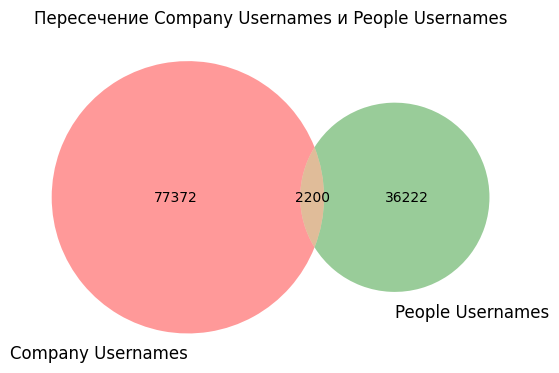

In [69]:
# Строим диаграмму Венна
venn2([set(company_rounds_df['network_username']), set(people_df['network_username'])], set_labels=('Company Usernames', 'People Usernames'))

# Отображаем график
plt.title("Пересечение Company Usernames и People Usernames")
plt.show()

Процент пересечений значений в столбцах `network_username` у датасетов `company_rounds_df` и `people_df` - 1,01 %. Скорее всего это случайные совпадения.

In [70]:
len(set(fund_df['network_username']).intersection(people_df['network_username']))

80

In [71]:
round(len(set(fund_df['network_username']).intersection(people_df['network_username'])) / people_df.shape[0] * 100, 2)

0.04

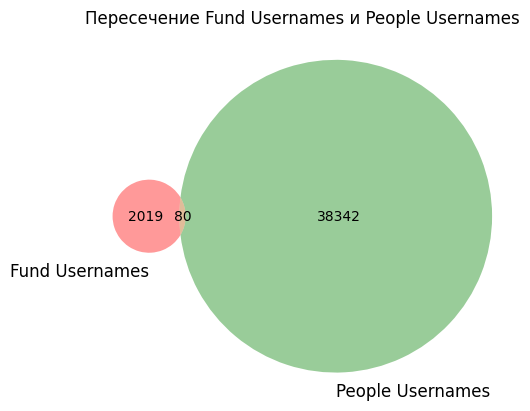

In [72]:
# Строим диаграмму Венна
venn2([set(fund_df['network_username']), set(people_df['network_username'])], set_labels=('Fund Usernames', 'People Usernames'))

# Отображаем график
plt.title("Пересечение Fund Usernames и People Usernames")
plt.show()

Процент пересечений значений в столбцах `network_username` у датасетов `fund_df` и `people_df` - 0,04%. Скорее всего это случайные совпадения.

In [73]:
len(set(company_rounds_df['network_username']).intersection(fund_df['network_username']))

71

In [74]:
round(len(set(company_rounds_df['network_username']).intersection(fund_df['network_username'])) / company_rounds_df.shape[0] * 100, 2)

0.03

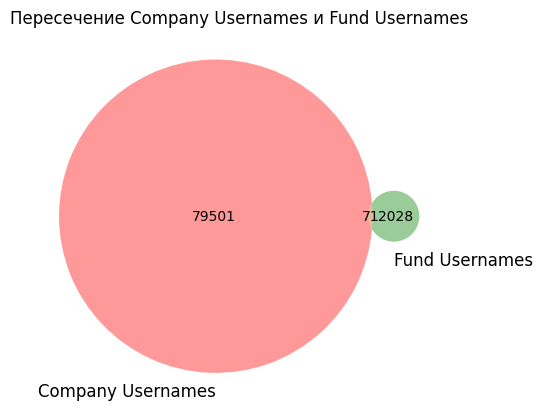

In [75]:
# Строим диаграмму Венна
venn2([set(company_rounds_df['network_username']), set(fund_df['network_username'])], set_labels=('Company Usernames', 'Fund Usernames'))

# Отображаем график
plt.title("Пересечение Company Usernames и Fund Usernames")
plt.show()

Процент пересечений значений в столбцах `network_username` у датасетов `company_rounds_df` и `fund_df` - 0,03 %. Скорее всего это случайные совпадения. В датасете `company_rounds_df` столбец `network_username` относится к стартапам, а в датасете `fund_df` - к фондам.

Объединить датасеты по столбцу `network_username` нельзя, так как в разных датасетах этот столбец содержит разные данные.


### 2.4. Исследование и преобразование датасета `company_and_rounds.csv`


In [76]:
pd.set_option('display.max_columns', None)
company_rounds_df.head()

,company_id,name,category_code,status,funded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,company_id_,funded_at_,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_at_year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [77]:
company_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   funded_at            109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

В датасете `company_rounds_df` два столбца (`company_id` и `company_id_`), содержащими одни и те же значения (в тех строках, где нет пропусков в этих столбцах.\
В столбцах с 0 по 12 максимальное количество значений без пропусков 217472. В столбцах с 13 по 22 - 52928.\
Столбцов, в которых совсем нет пропусков, нет.
Исходя из анализа пропусков часть датасета с 0 по 12 столбец отличается от части датасета с 13 по 22 столбец.\
В столбцах с 0 по 12 данные относятся к компаниям, в столбцах с 13 по 22 данные детализируют информацию по раундам финансирования.\
Значение в столбце `funding_rounds` соответствует количеству строчек, в которых значения в столбцах 0-12 полностью дублируются. При этом значения в столбцах 13-22 отличаются.\
Видимо датасет `company_rounds_df` получен объединением двух датасетов. Первый датасет - с 0 по 12 столбец; второй датасет - с 13 по 22 столбец. Возможно имеет смысл разделить датасет на два, чтобы убрать большое количество пропусков, возникших при объединении датасетов.

In [78]:
company_rounds_df.columns

Index(['company_id', 'name', 'category_code', 'status', 'funded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_', 'funded_at_', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round', 'funded_at_year'],
      dtype='object')

In [79]:
company_df = company_rounds_df[['company_id', 'name', 'category_code', 'status', 'funded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones']]
rounds_df = company_rounds_df[['funding_round_id', 'company_id_', 'funded_at_', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round', 'funded_at_year']]

In [80]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         217472 non-null  float64       
 1   name               217472 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   funded_at          109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float64       
 10  funding_rounds     217472 non-null  float64       
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


In [81]:
company_df.head()

,company_id,name,category_code,status,funded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0


Удалим из датасета `company_df` строки, все значения в которых отсутстуют.

In [82]:
company_df = company_df.dropna(how='all')
company_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217472 entries, 0 to 217471
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         217472 non-null  float64       
 1   name               217472 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   funded_at          109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float64       
 10  funding_rounds     217472 non-null  float64       
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


Проверим датасет `company_df` на дубликаты.

In [83]:
company_df.duplicated().sum()

20919

В датасете содержится 20919 явных дубликатов. Удалим дубликаты.

In [84]:
print(f'Количество строк до удаления дубликатов {company_df.shape[0]}')
company_df = company_df.drop_duplicates(inplace=False)
print(f'Количество строк после удаления дубликатов {company_df.shape[0]}')

Количество строк до удаления дубликатов 217472
Количество строк после удаления дубликатов 196553


Посчитаем количество уникальных значений столбца `company_ID`.

In [85]:
company_df['company_id'].nunique()

196553

Все значения столбца `company_id` уникальны. Выведем уникальные значения столбца `category_code`.

In [86]:
company_df['category_code'].unique()

array(['web', 'games_video', 'network_hosting', 'advertising',
       'cleantech', nan, 'enterprise', 'other', 'consulting', 'mobile',
       'health', 'software', 'analytics', 'finance', 'education',
       'medical', 'manufacturing', 'biotech', 'ecommerce',
       'public_relations', 'hardware', 'search', 'news', 'government',
       'security', 'photo_video', 'travel', 'semiconductor', 'social',
       'legal', 'transportation', 'hospitality', 'sports', 'nonprofit',
       'fashion', 'messaging', 'music', 'automotive', 'design',
       'real_estate', 'local', 'nanotech', 'pets'], dtype=object)

Повторяющихся значений нет. Выведем уникальные значения столбца `status`.

In [87]:
company_df['status'].unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

Повторяющихся значений нет.

Оставим в датасете столбцы, которые потребуются в дальнейшем анализе.

In [88]:
company_df = company_df[['company_id', 'name', 'category_code', 'status', 'investment_rounds', 'funding_rounds', 'funding_total']]


Выведем информацию о датасете `company_df`.

In [89]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196553 entries, 0 to 217469
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   company_id         196553 non-null  float64
 1   name               196553 non-null  object 
 2   category_code      123186 non-null  object 
 3   status             196553 non-null  object 
 4   investment_rounds  196553 non-null  float64
 5   funding_rounds     196553 non-null  float64
 6   funding_total      196553 non-null  float64
dtypes: float64(4), object(3)
memory usage: 12.0+ MB


Выведем информацию о датасете `rounds_df`.

In [90]:
rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id_          52928 non-null  float64       
 2   funded_at_           52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
 9   funded_at_year       52680 non-null  period[A-DEC] 
dtypes: datetime64[ns](1), float64(7), object(1), period[A-DEC](1)
memory usage: 16.6+ MB


Из датасета `rounds_df` удалим строки, для которых во всех столбцах значения пропущены. 

In [91]:
rounds_df = rounds_df.dropna(how='all')

Проверим датасет на дубликаты.

In [92]:
rounds_df.duplicated().sum()

0

Явных дубликатов нет.

In [93]:
rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52928 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id_          52928 non-null  float64       
 2   funded_at_           52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
 9   funded_at_year       52680 non-null  period[A-DEC] 
dtypes: datetime64[ns](1), float64(7), object(1), period[A-DEC](1)
memory usage: 4.4+ MB


После анализа структуры пропусков и данных датасета `company_rounds`, он был разделен на два датасета: один - с информацией о компаниях, другой - с информацией о раундах. Из датасета `company` удалены строки, содержащие только пропущенные значения и дубликаты, и ненужные столбцы.


## 3. Исследовательский анализ объединённых таблиц



### 3.1. Объединение данных


Отберем строки датасета `company_df`, удовлетворяющие условиям: значения funding_rounds или investment_rounds больше нуля или в колонке status указано acquired.

In [94]:
company_new_df = company_df[(company_df['funding_rounds'] > 0) | (company_df['investment_rounds'] > 0) | (company_df['status'] == 'acquired')]
company_new_df.shape

(40747, 7)

Выведем информацию о отфильтрованном датасете.

In [95]:
company_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company_id         40747 non-null  float64
 1   name               40747 non-null  object 
 2   category_code      35315 non-null  object 
 3   status             40747 non-null  object 
 4   investment_rounds  40747 non-null  float64
 5   funding_rounds     40747 non-null  float64
 6   funding_total      40747 non-null  float64
dtypes: float64(4), object(3)
memory usage: 2.5+ MB


Количество строк нового датасета - 40747.

Объединим датасеты `company_new_df` и `acquisition_df` и выведем информацию об объединенном датасете.

In [96]:
company_acquisition_df = pd.merge(company_new_df, acquisition_df, left_on='company_id', right_on='acquired_company_id', how='left')
company_acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40890 entries, 0 to 40889
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            40890 non-null  float64       
 1   name                  40890 non-null  object        
 2   category_code         35436 non-null  object        
 3   status                40890 non-null  object        
 4   investment_rounds     40890 non-null  float64       
 5   funding_rounds        40890 non-null  float64       
 6   funding_total         40890 non-null  float64       
 7   id                    9390 non-null   float64       
 8   acquiring_company_id  9390 non-null   float64       
 9   acquired_company_id   9390 non-null   float64       
 10  term_code             1830 non-null   object        
 11  price_amount          9390 non-null   float64       
 12  acquired_at           9361 non-null   datetime64[ns]
dtypes: datetime64[ns

Проверим датасет на дубликаты по столбцу `company_id`.

In [97]:
company_acquisition_df.duplicated(subset='company_id').sum()

143

В датасете 143 дубликата по столбцу `company_id`. Они возникли при объединении датасетов, так как в датасете `acquisition_df` значения в столбце `acquired_company_id` повторяются. Одна и та же компания может получать финансирование (или покупаться) несколько раз. Поэтому удалять такие дубликаты не нужно.


### 3.2. Анализ выбросов

Определим обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.


Посмотрим, какие значения есть в столбце `funding_total`.

In [98]:
nmb = company_new_df['funding_total'].value_counts()
nmb.reset_index().sort_values(by='index')

,index,funding_total
0,0.000000e+00,12873
6310,2.910000e+02,1
161,1.000000e+03,19
3979,1.003000e+03,1
7754,1.100000e+03,1
...,...,...
2516,2.400000e+09,1
4215,2.425700e+09,1
4915,2.600000e+09,1
3104,3.985050e+09,1


Отфильтруем нулевые значения столбца `funding_total` и построим диаграмму размаха.

In [99]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
company_new_df[company_new_df['funding_total'] > 0]['funding_total'].describe()

count        27874.00
mean      14816520.27
std       67759363.12
min            291.00
25%         500000.00
50%        2564500.00
75%       11000000.00
max     5700000000.00
Name: funding_total, dtype: float64

Значение среднего (14 816 520 долларов) значительно больше медианного значения (2 564 500 долларов), что свидетельствует о наличии выбросов с очень большими значениями в столбце `funding_total`. Об этом свидетельствует и то, что в то время как 75% всех значений меньше 11 млн. долларов, максимальное значение - 5,7 млрд. долларов. Стандартное отклонение очень большое (67 759 363 доллара), что свидетельствует о значительном разбросе данных.  Построим диаграмму разброса и гистограмму для ненулевых значений столбца `funding_total`.

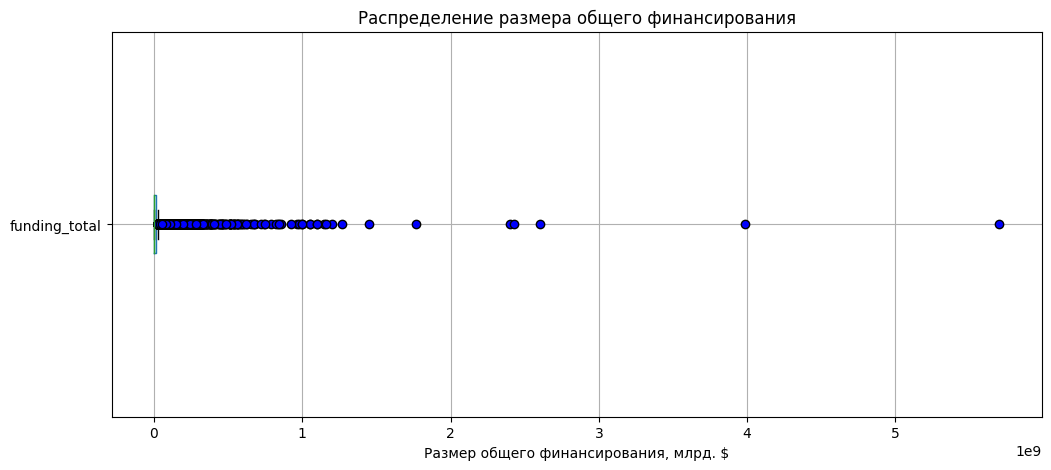

In [100]:
fund_total_df = company_new_df[company_new_df['funding_total'] > 0]
fund_total_df.boxplot(column='funding_total',
                       figsize=(12,5),
                       vert=False,
                       flierprops=dict(markerfacecolor='blue', marker='o'),
                       grid=True)

plt.title('Распределение размера общего финансирования')
plt.xlabel('Размер общего финансирования, млрд. $')

plt.show()

Отключим демонстрацию выбросов.

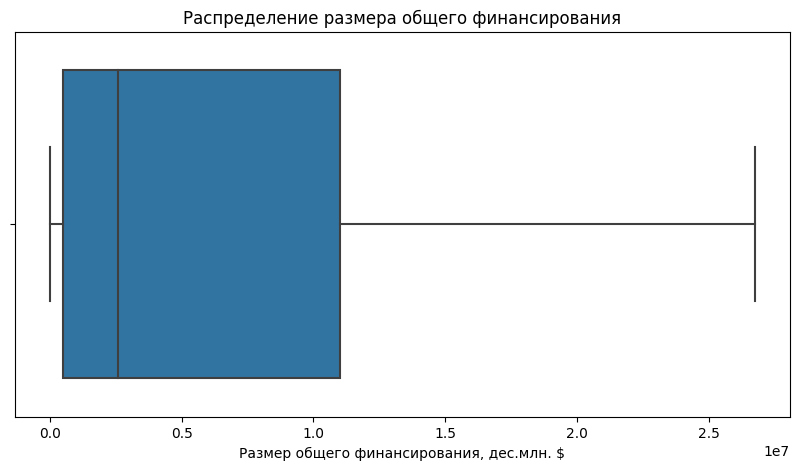

In [101]:

plt.figure(figsize=(10,5))

sns.boxplot(x='funding_total', 
            data=fund_total_df,
            showfliers=False
           )

plt.title('Распределение размера общего финансирования')
plt.xlabel('Размер общего финансирования, дес.млн. $')


plt.show()

По диаграмме размаха видно, что типичное (медианное) значение размера общего финансирования примерно 2,6 млн. долларов. Выбивающиеся значения  - больше 26 млн. долларов.

Посчитаем верхний порог выбросов.

In [102]:
# Рассчитываем первый и третий квартили
q1 = fund_total_df['funding_total'].quantile(0.25)
q3 = fund_total_df['funding_total'].quantile(0.75)
# Рассчитываем межквартильный размах
iqr = q3 - q1
# Рассчитываем верхний порог для выбросов
upper_limit = q3 + 1.5 * iqr
print(f'Верхний порог выбросов равен {upper_limit} долларов.')

Верхний порог выбросов равен 26750000.0 долларов.


Построим гистограмму распределения общего размера финансирования.

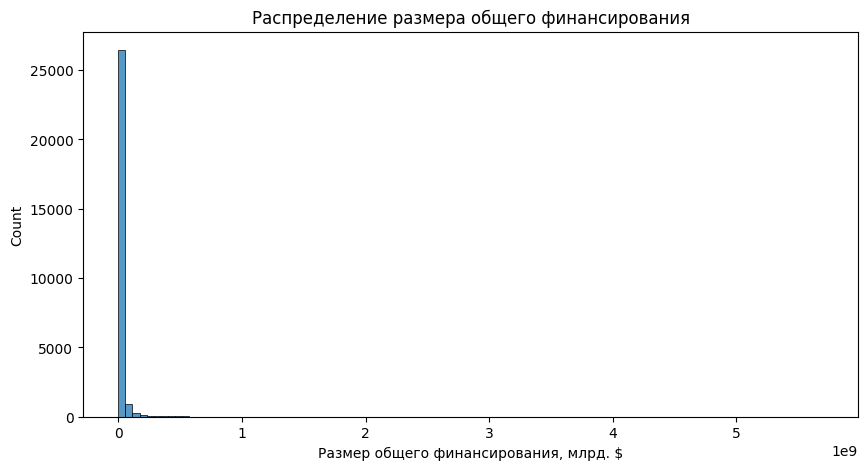

In [103]:
plt.figure(figsize=(10,5))

sns.histplot(x='funding_total', 
            data=fund_total_df,
            bins=100
           )

plt.title('Распределение размера общего финансирования')
plt.xlabel('Размер общего финансирования, млрд. $')


plt.show()

Ограничим диапазон шкалы для размера общего финансирования.

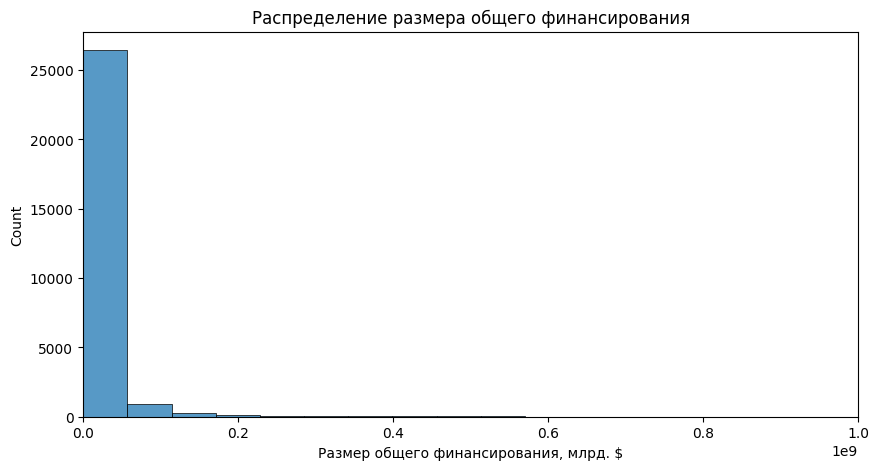

In [104]:
plt.figure(figsize=(10,5))

sns.histplot(x='funding_total', 
            data=fund_total_df,
            bins=100
           )

plt.title('Распределение размера общего финансирования')
plt.xlabel('Размер общего финансирования, млрд. $')
plt.xlim(0, 1000000000)

plt.show()

По гистограмме также видно, что зона выбросов начинается после 26-30 млн. долларов.

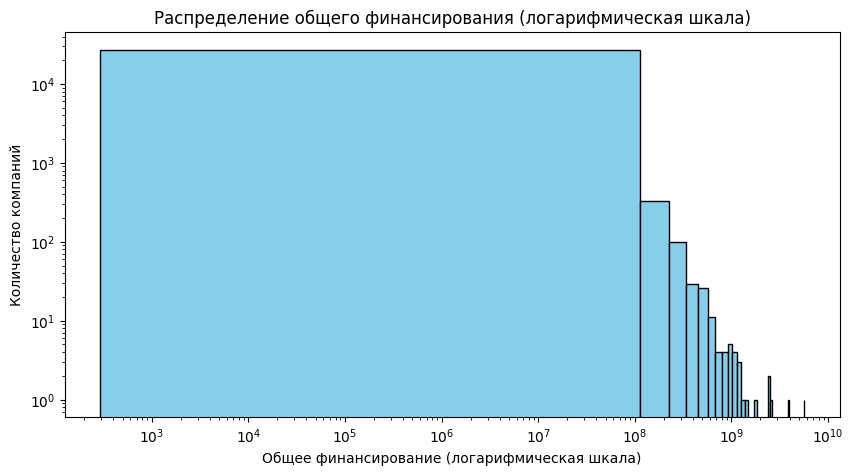

In [105]:
plt.figure(figsize=(10,5))

# код ревьюера
    

plt.hist(fund_total_df['funding_total'], bins=50, color='skyblue', edgecolor='black', log=True)
plt.xscale('log')  # Логарифмическая шкала по оси X
plt.xlabel('Общее финансирование (логарифмическая шкала)')
plt.ylabel('Количество компаний')
plt.title('Распределение общего финансирования (логарифмическая шкала)')



plt.show()

Типичное (медианное) значение размера общего финансирования - 2,6 млн. долларов. Выбивающиеся значения начинаются от значения 26,75 млн. долларов.


### 3.3. Исследование компаний, которые были проданы за ноль или за один доллар, но с ненулевым общим объёмом финансирования


Отберем компании, которые были проданы за ноль или за один доллар, но с ненулевым общим объёмом финансирования.

In [106]:
zero_one_company = company_acquisition_df[((company_acquisition_df['price_amount'] == 0) | (company_acquisition_df['price_amount'] == 1)) & (company_acquisition_df['funding_total'] > 0)]
zero_one_company

,company_id,name,category_code,status,investment_rounds,funding_rounds,funding_total,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
25,10054.00,Jumptap,mobile,acquired,0.00,7.00,121500000.00,9288.00,23283.00,10054.00,cash_and_stock,0.00,2013-08-13
63,101312.00,SideTour,web,acquired,0.00,3.00,4000000.00,9653.00,11391.00,101312.00,NaN,0.00,2013-09-18
66,101340.00,ChoicePass,enterprise,acquired,0.00,1.00,250000.00,7272.00,1972.00,101340.00,NaN,0.00,2012-06-18
67,10137.00,Producteev,software,acquired,0.00,3.00,1310000.00,8254.00,757.00,10137.00,cash_and_stock,0.00,2012-11-05
68,10139.00,TradeCard,enterprise,acquired,0.00,2.00,44925000.00,9326.00,44008.00,10139.00,NaN,0.00,2013-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40834,99.00,Amie Street,web,acquired,0.00,2.00,3900000.00,7024.00,317.00,99.00,NaN,0.00,2010-09-22
40836,9905.00,UBmatrix,software,acquired,0.00,2.00,5172350.00,3381.00,41119.00,9905.00,NaN,0.00,2010-06-24
40840,992.00,wunderloop,advertising,acquired,0.00,1.00,10000000.00,9916.00,19182.00,992.00,NaN,0.00,2010-07-02
40854,997.00,Zimbra,enterprise,acquired,0.00,1.00,14500000.00,9121.00,415.00,997.00,NaN,0.00,2013-07-15


In [107]:
# Рассчитываем первый и третий квартили
q1 = zero_one_company['funding_total'].quantile(0.25)
q3 = zero_one_company['funding_total'].quantile(0.75)
# Рассчитываем межквартильный размах
iqr = q3 - q1
# Рассчитываем нижний порог для выбросов
lower_limit = max(0, q1 - 1.5 * iqr)
print(f'Нижний порог выбросов равен {lower_limit}')
# Рассчитываем верхний порог для выбросов
upper_limit = q3 + 1.5 * iqr
print(f'Верхний порог выбросов равен {upper_limit}')

Нижний порог выбросов равен 0
Верхний порог выбросов равен 35750000.0


Так как нижний порог имеет отрицательное значение, то можно принять 0 за нижний порог выбросов. Верхний порог равен 35 750 000 долларов.

Рассчитаем какому процентилю соответствует верхний порог выбросов.

In [108]:
q_upper_limit = round(zero_one_company[zero_one_company['funding_total'] < 35750000].shape[0] / zero_one_company.shape[0] * 100, 2)
print(f'Процентиль, соответствующий верхнему порогу выбросов равен {q_upper_limit}')

Процентиль, соответствующий верхнему порогу выбросов равен 90.91


Верхний порог выбросов соответствует примерно 91 процентилю. Нижний порог выбросов был принят за 0.


### 3.4. Цены стартапов по категориям


Посчитаем статистические данные по столбцу `price_amount`.

In [109]:
company_acquisition_df.groupby('category_code')['price_amount'].describe().reset_index().sort_values(by='count')

,category_code,count,mean,std,min,25%,50%,75%,max
29,pets,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,government,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,nonprofit,1.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00
24,nanotech,1.00,584000000.00,NaN,584000000.00,584000000.00,584000000.00,584000000.00,584000000.00
18,local,3.00,5380066.67,9318548.81,0.00,0.00,0.00,8070100.00,16140200.00
6,design,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
17,legal,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,automotive,5.00,1528600000.00,2297757559.01,0.00,0.00,43000000.00,2400000000.00,5200000000.00
38,sports,5.00,249000000.00,426561836.08,0.00,0.00,0.00,260000000.00,985000000.00
39,transportation,7.00,192857142.86,408848557.36,0.00,0.00,0.00,125000000.00,1100000000.00


Так как разброс данных велик, будем оценивать типичные цены по медианному значению, а разброс значений по стандартному отклонению. Отфильтруем нулевые значения и значения, большие чем 90-й процентиль, чтобы исключить влияние нереалистичных значений. 

In [110]:
q90 = company_acquisition_df['price_amount'].quantile(0.9)

company_acquisition_limited = company_acquisition_df[(company_acquisition_df['price_amount'] > 0) & (company_acquisition_df['price_amount'] < q90)]
category_price = company_acquisition_limited.groupby('category_code')['price_amount'].agg(['count', 'mean', 'std']).reset_index().sort_values(by='count')
category_price

,category_code,count,mean,std
1,analytics,1,80000000.00,NaN
2,automotive,1,43000000.00,NaN
32,transportation,1,20000000.00,NaN
9,fashion,1,97500000.00,NaN
15,local,1,16140200.00,NaN
17,medical,2,25750000.00,6010407.64
20,music,2,2930000.00,2729432.18
33,travel,2,3500000.00,2121320.34
30,social,3,33833333.33,28223807.92
26,real_estate,3,31000000.00,24758836.81


Отфильтруем категории с количеством компаний больше 20.

In [111]:
category_price = category_price[category_price['count'] > 20]
category_price

,category_code,count,mean,std
5,consulting,23,27021304.35,24544668.61
6,ecommerce,24,31117083.79,36626701.36
21,network_hosting,34,35763029.41,32743294.32
29,semiconductor,38,38878157.89,31184221.14
25,public_relations,40,30710875.00,34950721.28
12,hardware,44,30151182.93,28210288.05
23,other,46,26694684.80,26826827.31
0,advertising,54,34646111.11,27636364.97
11,games_video,56,34434483.21,30602793.69
8,enterprise,69,30917449.28,29638414.88


Построим диаграмму рассеяния для медианного значения цены и стандартного отклонения в разбивке по категориям.

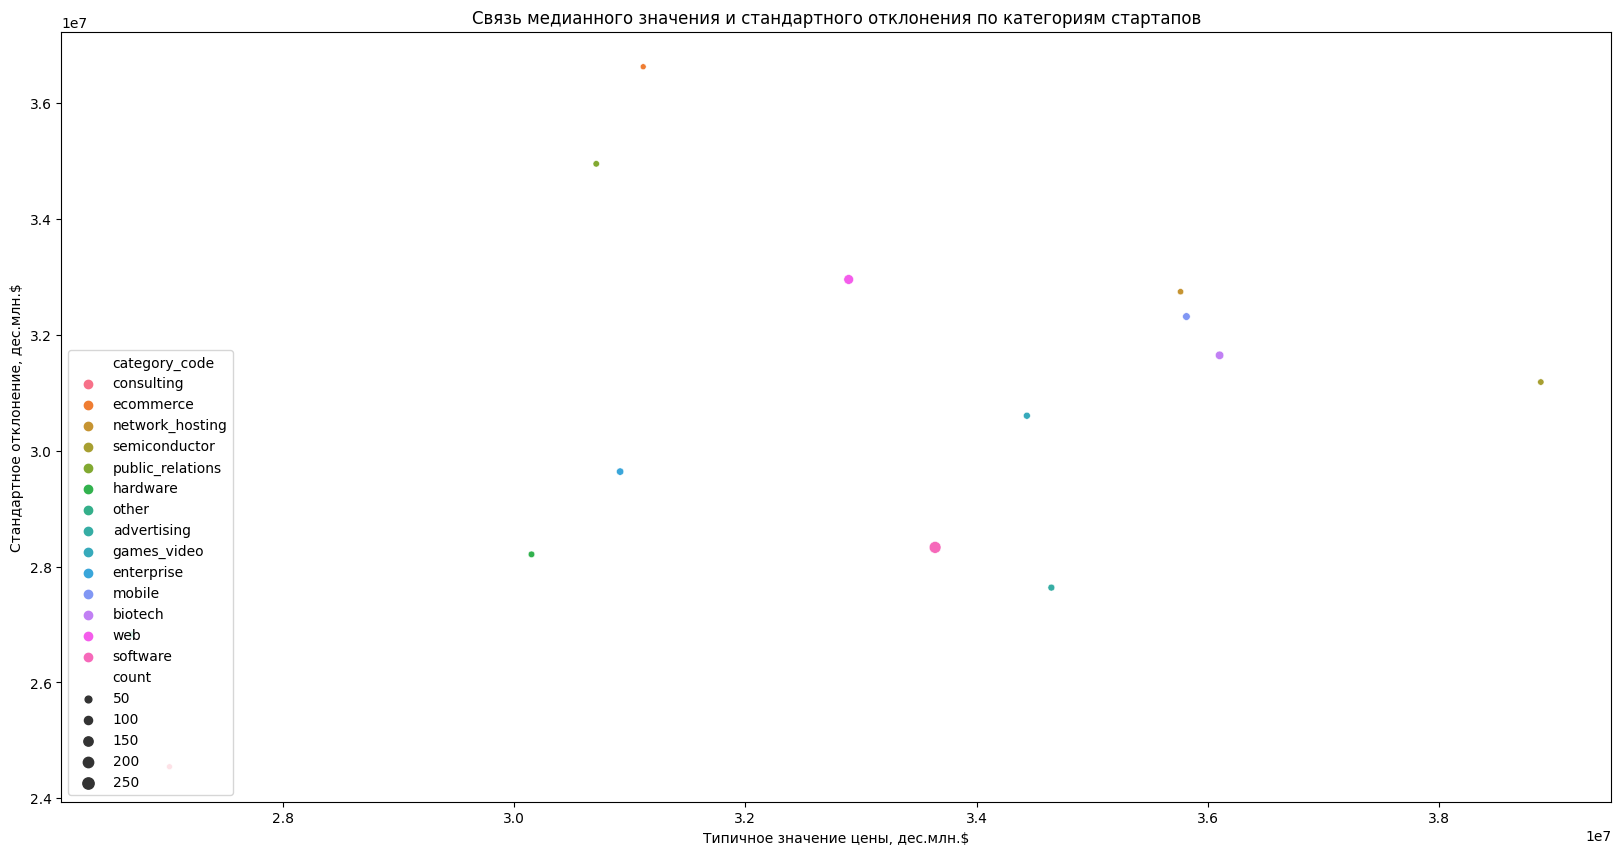

In [112]:
plt.figure(figsize=(20,10))

sns.scatterplot(data=category_price,
               x='mean',
               y='std',
               hue='category_code',
               size='count'
               )

plt.title('Связь медианного значения и стандартного отклонения по категориям стартапов')
plt.xlabel('Типичное значение цены, дес.млн.$')
plt.ylabel('Стандартное отклонение, дес.млн.$')
plt.legend(loc='lower left')

plt.show()

По диаграмме рассеяния топ-4 категорий с высоким типичным значением цены и высоким разбросом: "semiconductor", "biotech", "mobile", "network_hosting".


### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

Посмотрим на распределение значений в столбце `funding_rounds`.

In [113]:
company_acquisition_df['funding_rounds'].describe()

count   40890.00
mean        1.29
std         1.26
min         0.00
25%         1.00
50%         1.00
75%         2.00
max        15.00
Name: funding_rounds, dtype: float64

In [114]:
status_rounds = company_acquisition_df.groupby('status')['funding_rounds'].mean().reset_index().sort_values(by='funding_rounds', ascending=False)
status_rounds

,status,funding_rounds
2,ipo,1.93
3,operating,1.52
1,closed,1.38
0,acquired,0.53


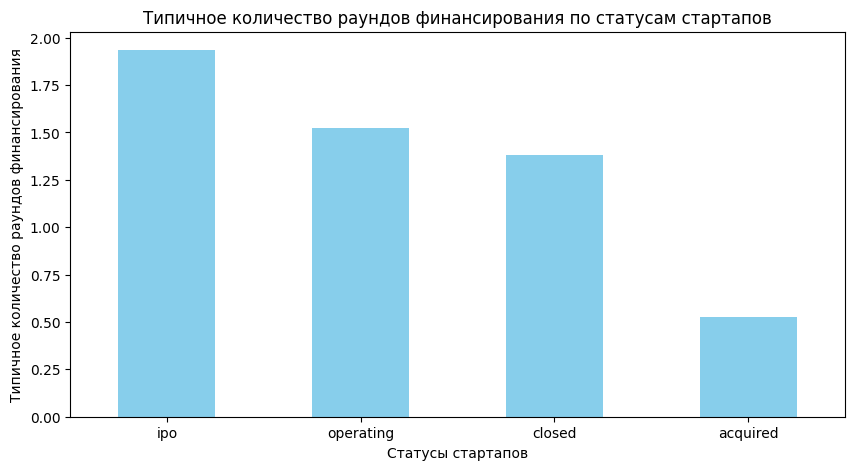

In [115]:
status_rounds.plot(kind='bar',
             figsize=(10,5),
             x='status',
             y='funding_rounds',
             color='skyblue',
             title='Типичное количество раундов финансирования по статусам стартапов',
             xlabel='Статусы стартапов',
             ylabel='Типичное количество раундов финансирования',
             legend=False,
             rot=0)
                
plt.show()

Больше всего раундов финансирования проходят стартапы в категории "ipo" (среднее значение 1,93). Меньше всего - у категории "acquired" (среднее значение 0,53). Возможно успешные стартапы покупаются на ранних стадиях финансирования. Средние значения количества раундов финансирования немного больше у действующих стартапов, чем у закрытых. Возможно те стартапы, которые закрываются проходят в среднем 1,38 раундов финансирования. Действующие стартапы (которые не были куплены и закрыты) "доживают" до ipo.

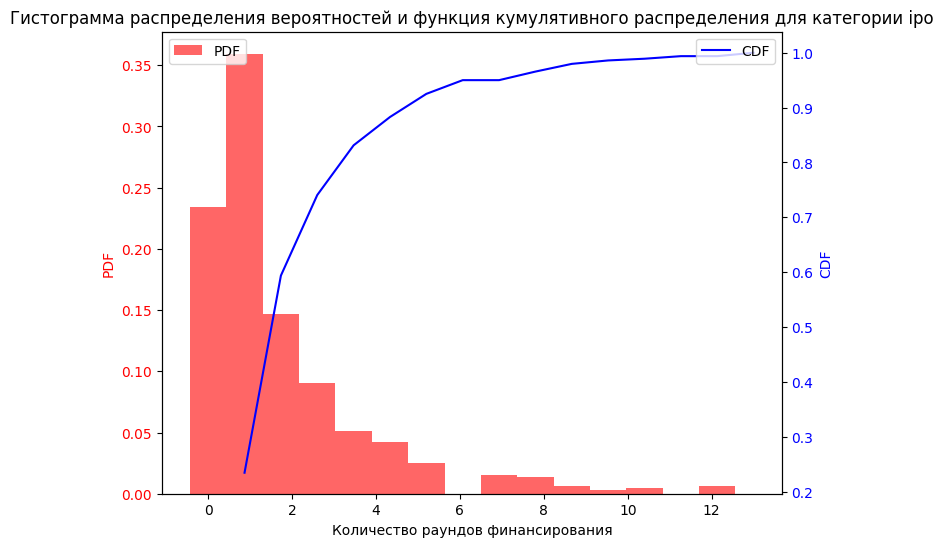

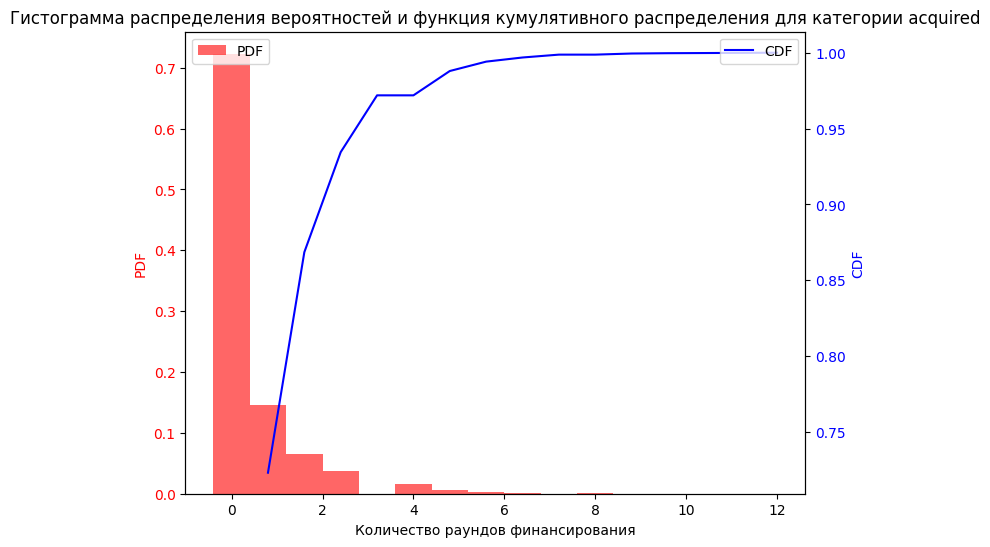

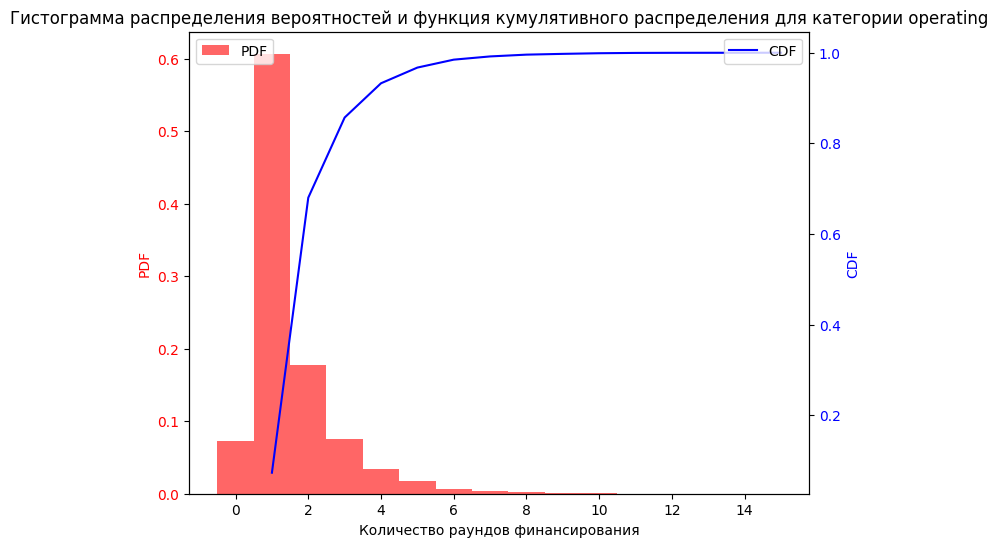

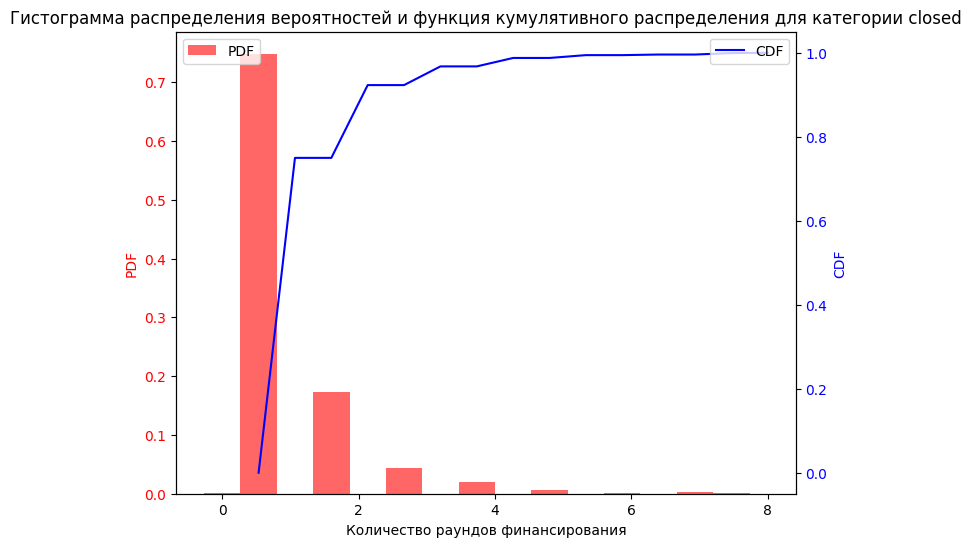

In [116]:
for status in ['ipo', 'acquired', 'operating', 'closed']:
    count, bins_count = np.histogram(company_acquisition_df[company_acquisition_df['status'] == status]['funding_rounds'], bins=15)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    
    fig, ax1 = plt.subplots(figsize=(8, 6))
    ax1.bar(bins_count[:-1], pdf, width=np.diff(bins_count), color='red', alpha=0.6, label="PDF")
    ax1.set_xlabel('Количество раундов финансирования')
    ax1.set_ylabel('PDF', color='red')
    ax1.tick_params(axis='y', labelcolor='red')
    ax2 = ax1.twinx()
    ax2.plot(bins_count[1:], cdf, color='blue', label="CDF")
    ax2.set_ylabel('CDF', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')
    plt.title(f'Гистограмма распределения вероятностей и функция кумулятивного распределения для категории {status}')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.show()


## 4. Итоговый вывод и рекомендации


1. Были загружены и изучены данные датасетов:
- acquisition.csv - с информацией о покупках одними компаниями других компаний;
- company_and_rounds.csv - с информацией о компаниях и раундах финансирования;
- people.csv - с информацией о сотрудниках;
- education.csv - с информацией об образовании сотрудника;
- degrees.csv - с информацией о типе образования сотрудника.

Данные проверены на корректность типов данных, пропуски и дубликаты. Скорректированы типы данных, изменены названия столбцов. Проанализированы пропуски в датасете `company_rounds`.

2. 
- с 2005г. типичный размер собранных в рамках одного раунда средств падает, а общее количество раундов за год растет.
- Доля сотрудников без информации об образовании составляет примерно 0,5 стартапов небольшой численности. Для более крупных стартапов доля сотрудников без образования ниже (0,29 для группы "более 50 сотрудников).
- Объединить датасеты по столбцу `network_username` нельзя, так как в разных датасетах этот столбец содержит разные данные.
- Датасет `company_rounds` был разделен на два датасета. Получившийся датасет `company` был подготовлен для дальнейшего анализа.
- Для дальнейшего анализа были отобраны данные датасета `company_df`, удовлетворяющие условиям: значения funding_rounds или investment_rounds больше нуля или в колонке status указано acquired. Создан объединенный датасет `company_acquisition_df`.
- Типичное значение размера общего финансирования - 2,6 млн. долларов. Выбивающиеся значения начинаются от значения 26,75 млн. долларов. 
- Для компаний, которые были проданы за ноль или за один доллар, но с ненулевым общим объёмом финансирования:
    верхний порог выбросов по столбцу `funding_total` равен 35 750 000 долларов и соответствует примерно 91 процентилю;\
    нижний порог выбросов был принят за 0.
- Топ-4 категорий стартапов по сочетанию высокого типичного значения цены и высокого разбросом цен: "semiconductor", "biotech", "mobile", "network_hosting".
- Больше всего раундов финансирования проходят стартапы в категории "ipo" (среднее значение 1,93). Меньше всего - у категории "acquired" (среднее значение 0,53). Возможно успешные стартапы покупаются на ранних стадиях финансирования. Закрываются стартапы в среднем после 1,38 раундов финансирования. Действующие стартапы (которые не были куплены и закрыты) "доживают" до ipo.
- Возможно определение типичного значения размера общего финансирования для стартапов не является корректным, так как компании могут сильно отличаются по области деятельности, необходимым затратам и количеству сотрудников. Также непонятно происхождение нулевых значений в столбце `funding_total`.